In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\dhana\Downloads\sales_data.csv")

DATA CLEANING

In [4]:
df.drop_duplicates()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,North,50000.0,7000.0,10%,Electronics,2025-01-01
1,Phone,South,40000.0,NaN,5%,Electronics,2025-01-05
2,Tablet,East,NaN,3000.0,15%,Electronics,2025-01-07
3,Chair,West,15000.0,2000.0,NaN,Furniture,2025-01-10
4,Desk,North,20000.0,2500.0,8%,Furniture,2025-01-15
5,Monitor,South,30000.0,4000.0,12%,Electronics,NaN
6,Printer,East,18000.0,1500.0,10%,Electronics,2025-01-20
7,Sofa,West,NaN,5000.0,20%,Furniture,2025-01-25
8,Headphones,North,10000.0,NaN,5%,Accessories,2025-01-28
9,Cabinet,South,12000.0,1700.0,8%,Furniture,NaN


In [6]:
df.isnull().sum()

Product     0
Region      0
Sales       2
Profit      2
Discount    1
Category    0
Date        2
dtype: int64

In [11]:
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())
df['Sales']= df['Sales'].fillna(df['Sales'].mean())
df['Discount']= df['Discount'].fillna(df['Discount'].mode()[0])
df['Date']= df['Date'].fillna('2025-02-10')

In [12]:
df.isnull().sum()

Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Convert date to datetime

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

Exploratory Data Analysis

Time series graph for Sales over time

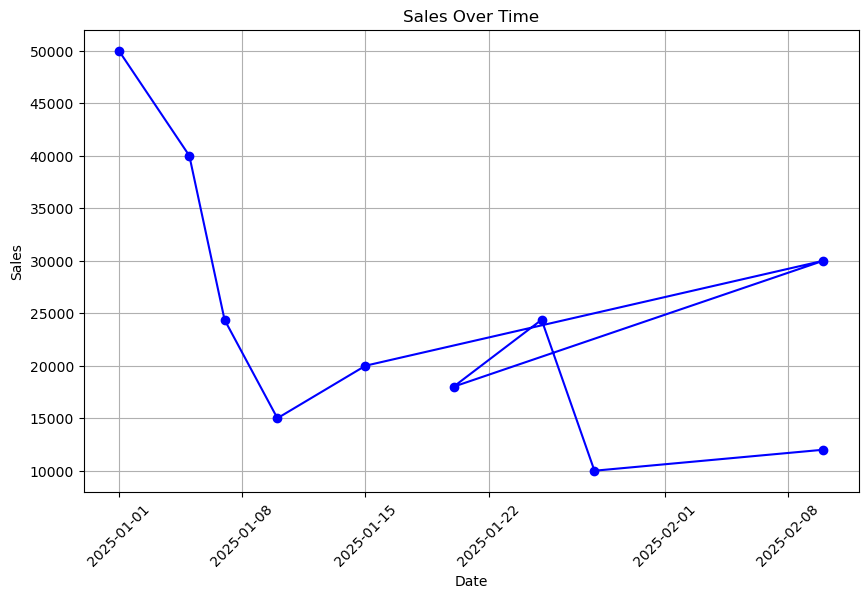

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df['Date'],df['Sales'], marker='o', linestyle='-', color='b')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Scatter plot for Profit vs Discount

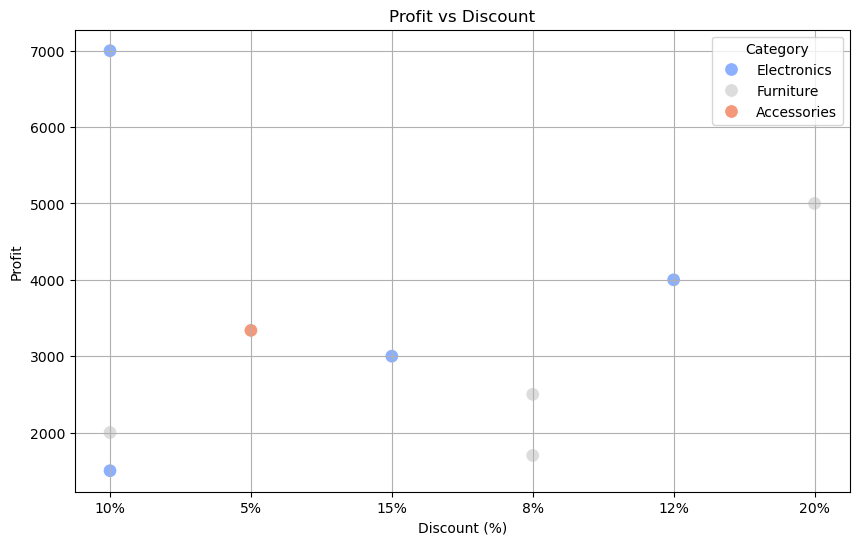

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', palette='coolwarm', s=100)
plt.title("Profit vs Discount")
plt.xlabel("Discount (%)")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

Bar plot for Sales distribution by Region

C:\Users\dhana\AppData\Local\Temp\ipykernel_28568\2667931516.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', ci=None, palette='muted')
C:\Users\dhana\AppData\Local\Temp\ipykernel_28568\2667931516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', ci=None, palette='muted')


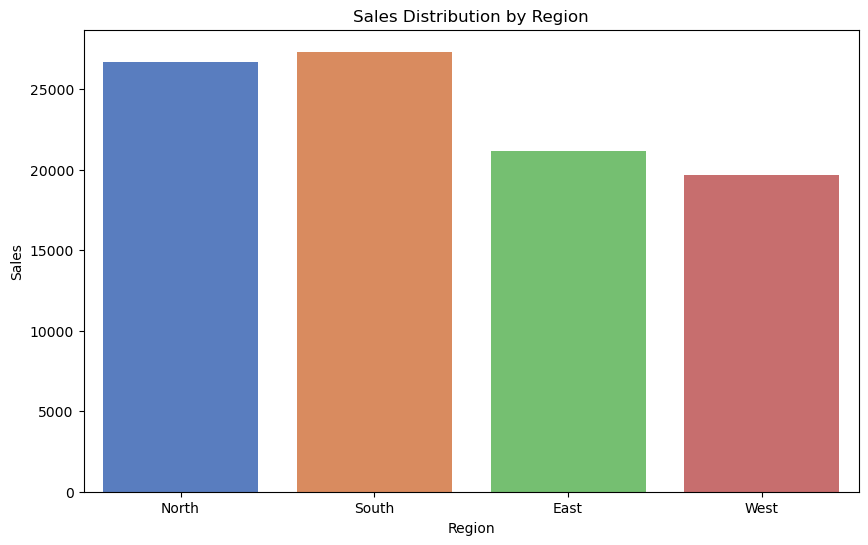

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Sales', ci=None, palette='muted')
plt.title("Sales Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

Pie chart for Sales distribution by Category

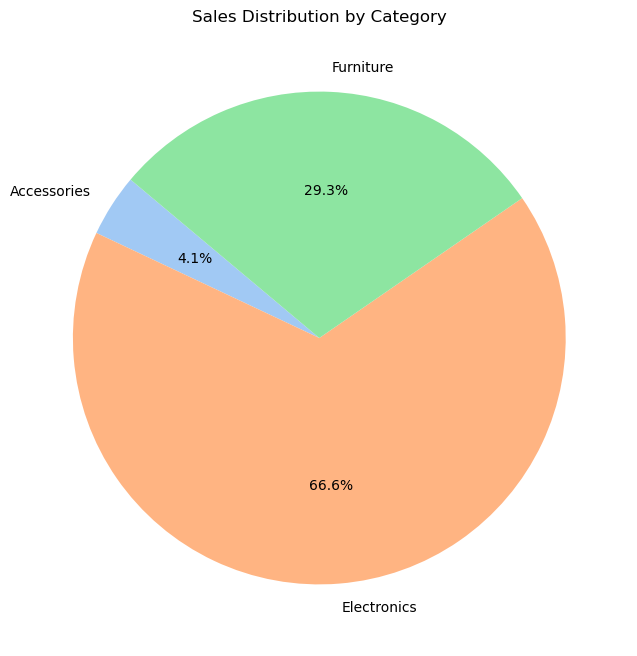

In [18]:
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Category")
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preprocess the data
df['Discount'] = df['Discount'].str.replace('%', '').astype(float)  # Convert Discount to a numerical feature

# Features and target variable
X = df[['Profit', 'Discount']]
y = df['Sales']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R2): {r2:.2f}")

# Show the coefficients
print("\nModel Coefficients:")
print(f"Profit Coefficient: {model.coef_[0]:.2f}")
print(f"Discount Coefficient: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")


Model Evaluation:
Mean Squared Error (MSE): 243670744.23
R-Squared (R2): -0.08

Model Coefficients:
Profit Coefficient: 6.41
Discount Coefficient: -770.15
Intercept: 11770.49
